In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_csv('./Latest Covid-19 India Status.csv')
data.head()

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10766,0,10637,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2340676,0,2325943,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,67049,0,66753,296,0.0,99.56,0.44,658019
3,Assam,746159,5,738119,8035,0.0,98.92,1.08,290492
4,Bihar,855267,1,842952,12314,0.0,98.56,1.44,40100376


## Univariate analysis

checking for the existence of missing values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


We can see that in the dataset, we have no missing values

### Descriptive statistics

In [15]:
data.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.249975e+06,50.333333,1.235146e+06,14778.527778,0.005000,98.897222,1.097778,3.971861e+07
std,1.846038e+06,207.118048,1.820328e+06,27221.140636,0.026673,0.506854,0.494791,5.050913e+07
min,1.076600e+04,0.000000,1.063700e+04,4.000000,0.000000,97.410000,0.030000,6.600100e+04
25%,1.065430e+05,0.000000,1.055395e+05,1124.250000,0.000000,98.690000,0.840000,1.695473e+06
50%,6.140910e+05,1.500000,6.076750e+05,6551.000000,0.000000,98.935000,1.065000,2.410088e+07
75%,1.331951e+06,9.000000,1.322329e+06,14325.750000,0.000000,99.160000,1.310000,6.979986e+07
max,8.171048e+06,1233.000000,8.022276e+06,148558.000000,0.160000,99.970000,2.440000,2.315026e+08


### Visualization

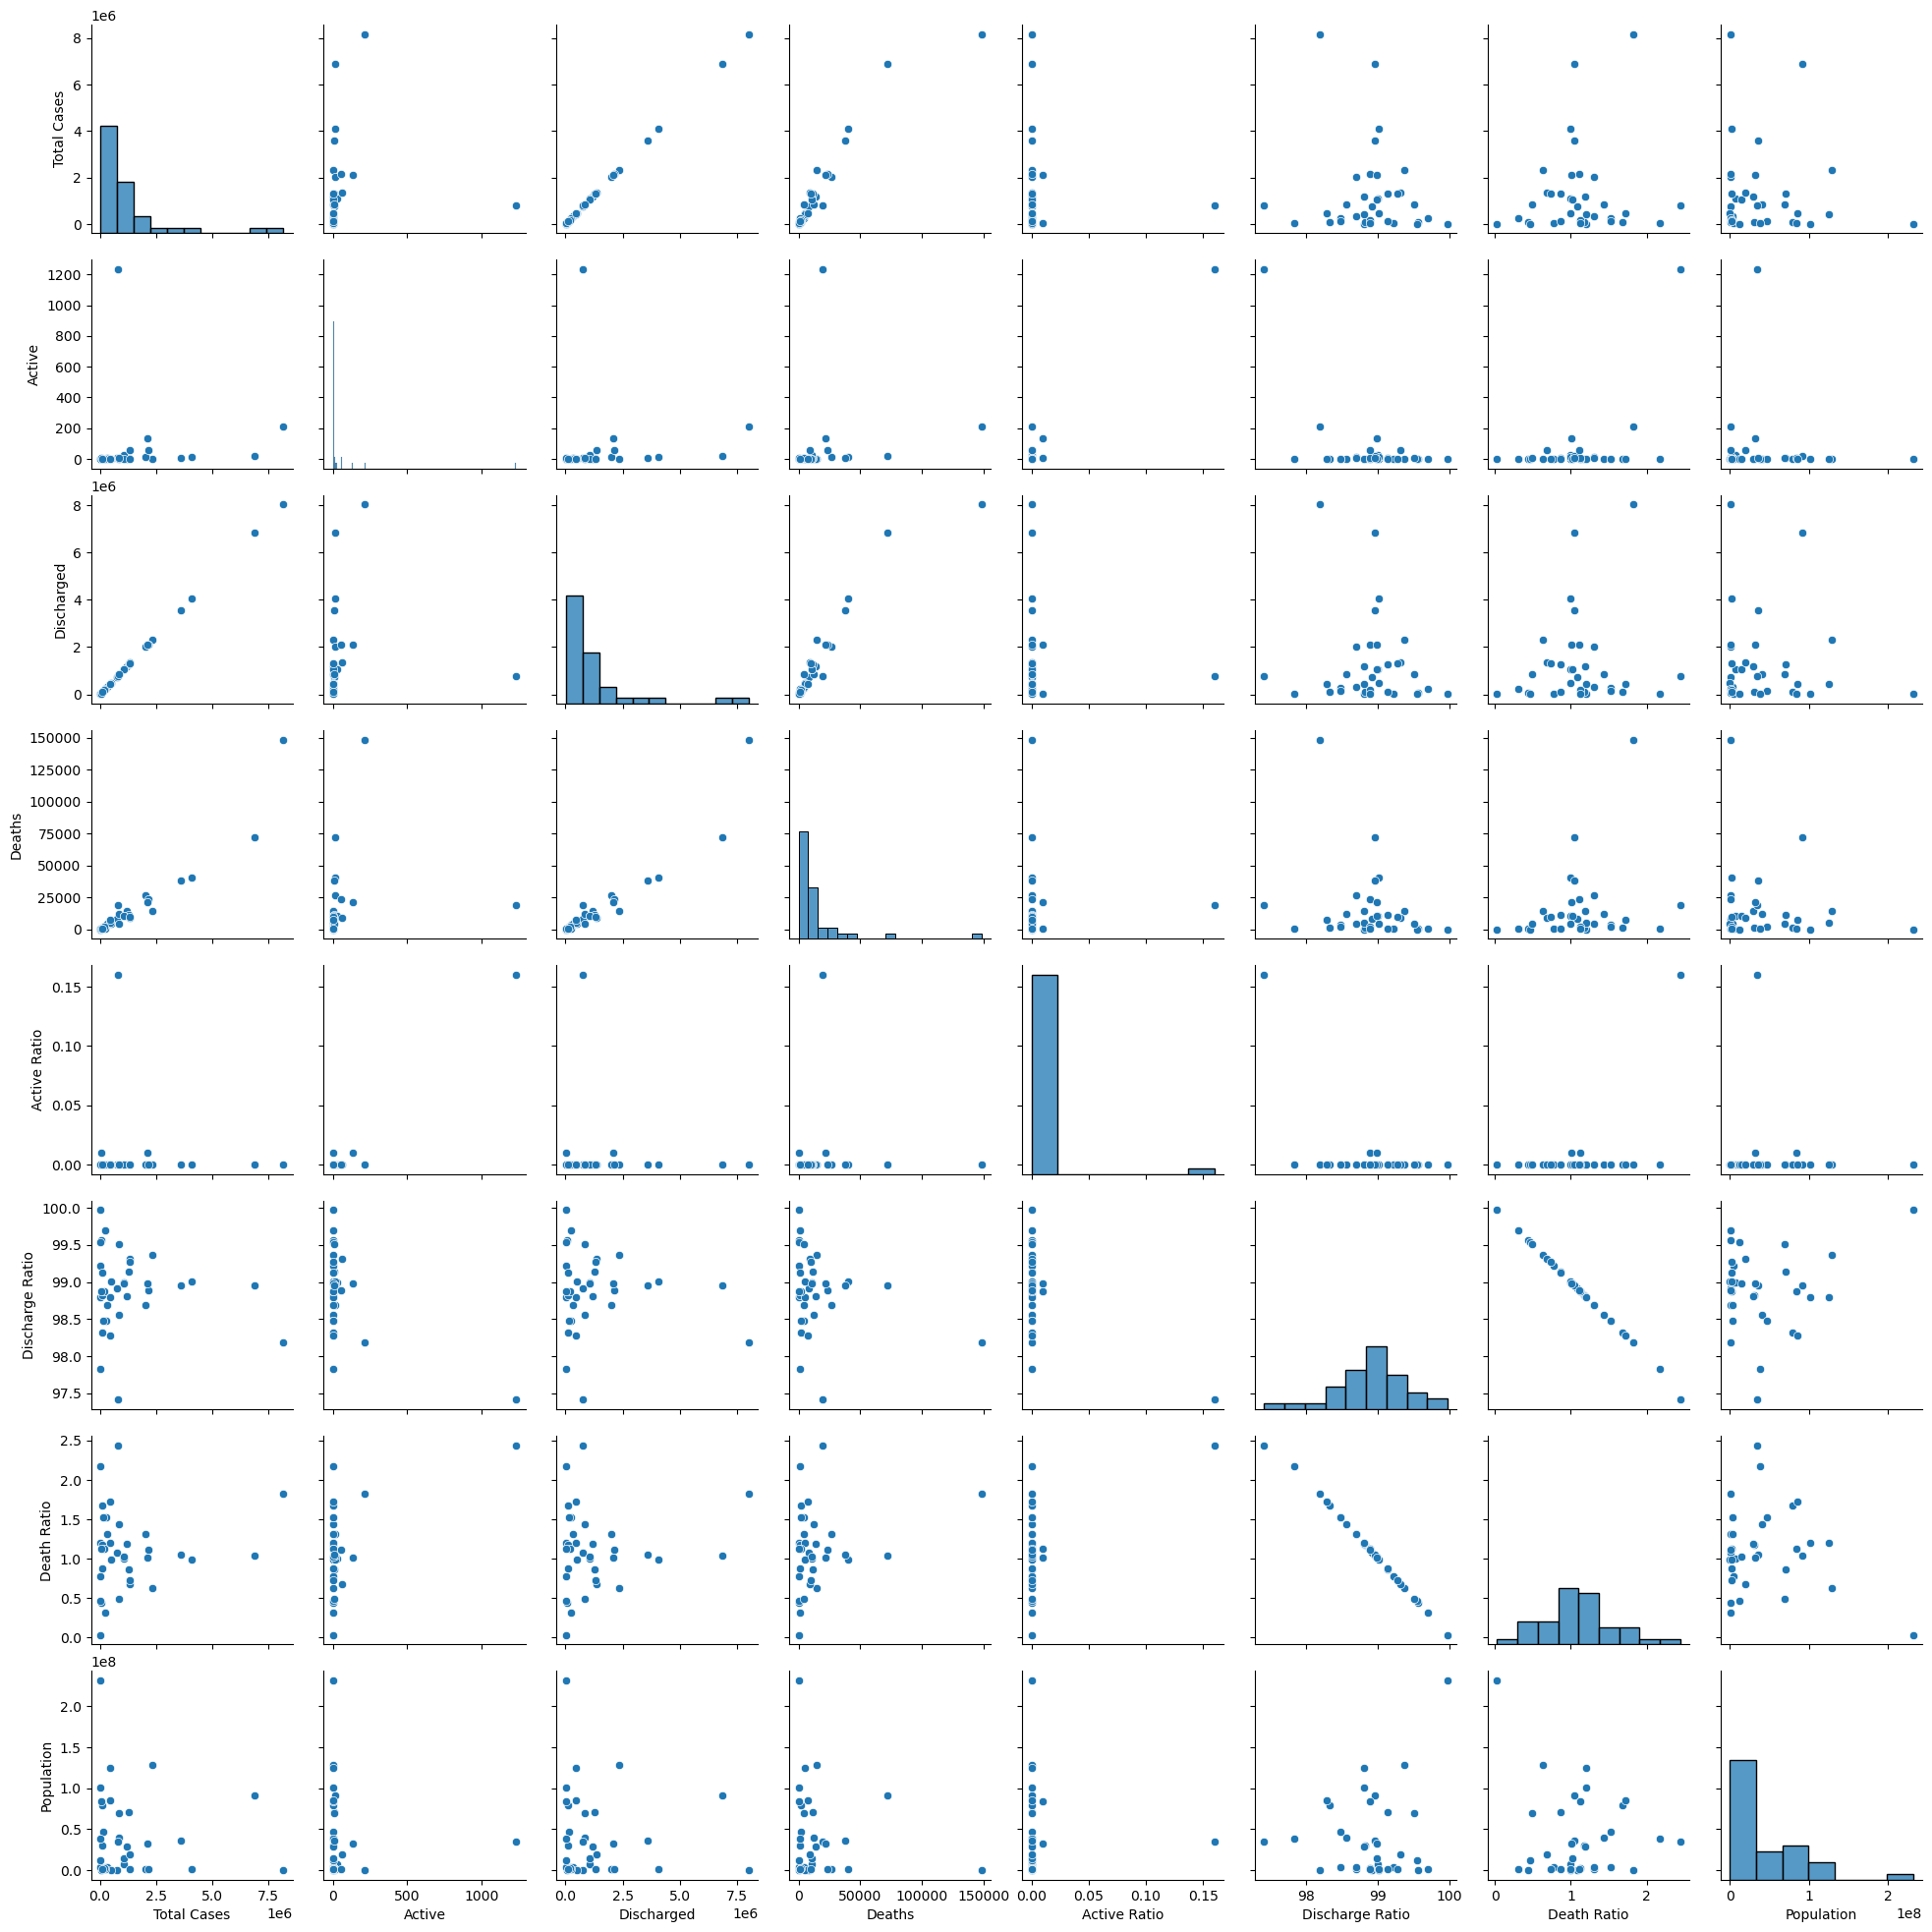

In [16]:
sns.pairplot(data)

In [20]:
columns = data.columns.tolist()

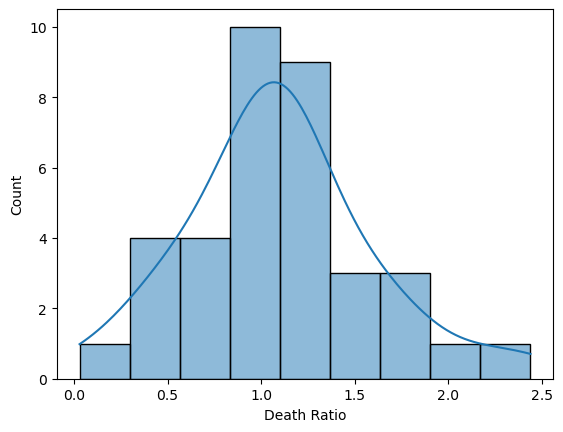

In [26]:
sns.histplot(data['Death Ratio'],kde=True);

In [49]:
from scipy.stats import kstest, norm,shapiro,pearsonr,spearmanr,kendalltau

In [31]:
statistic, p_value = kstest(data['Death Ratio'], 'norm')
round(p_value,3)

0.0

As the p-value is less than the significance threshold, then the hypothesis that the variable Death Ratio does follow a normal distribution is rejected

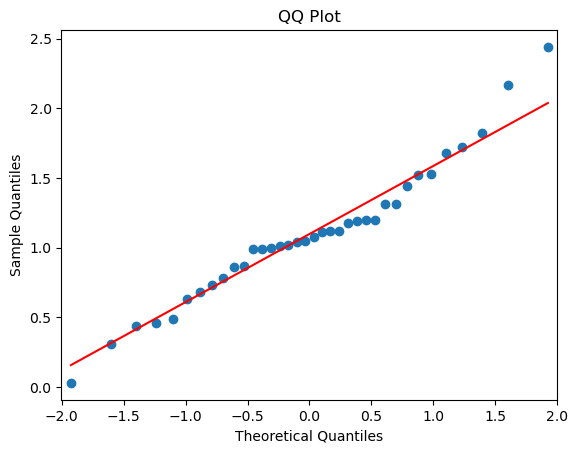

In [32]:
import statsmodels.api as sm
sm.qqplot(data['Death Ratio'], line='s')
plt.title("QQ Plot")
plt.show()

This QQplot confirms the statement made earlier

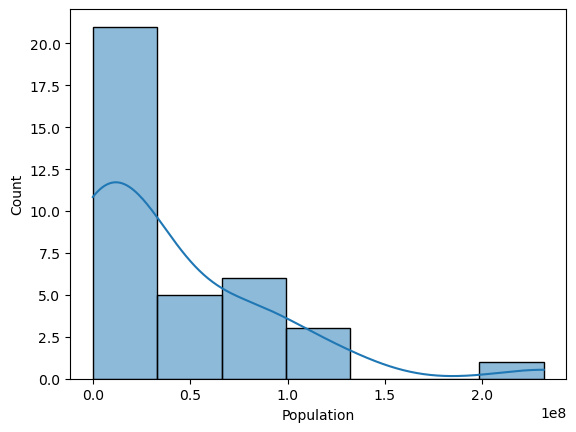

In [36]:
sns.histplot(data['Population'],kde=True);

In [35]:
statistic, p_value = kstest(data['Population'], 'norm')
round(p_value,3)

0.0

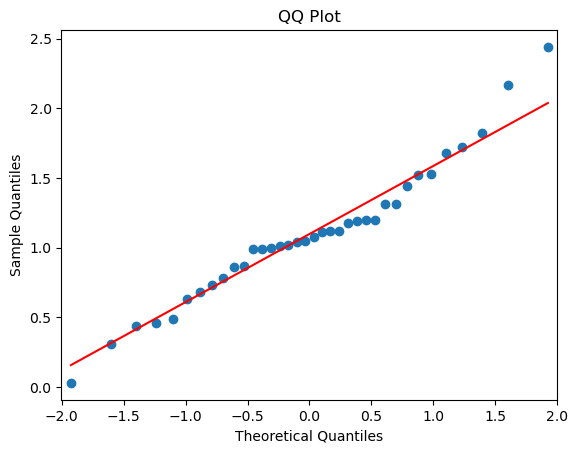

In [37]:
sm.qqplot(data['Death Ratio'], line='s')
plt.title("QQ Plot")
plt.show()

## Bivariate analysis

In [41]:
data.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio', 'Discharge Ratio', 'Death Ratio', 'Population'],
      dtype='object')

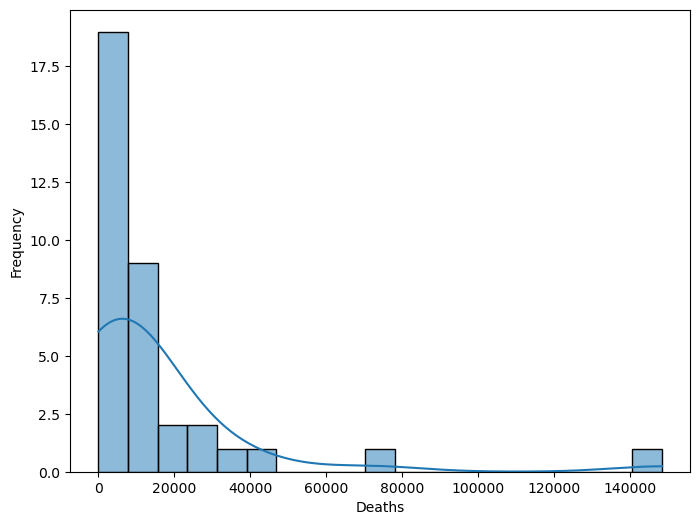

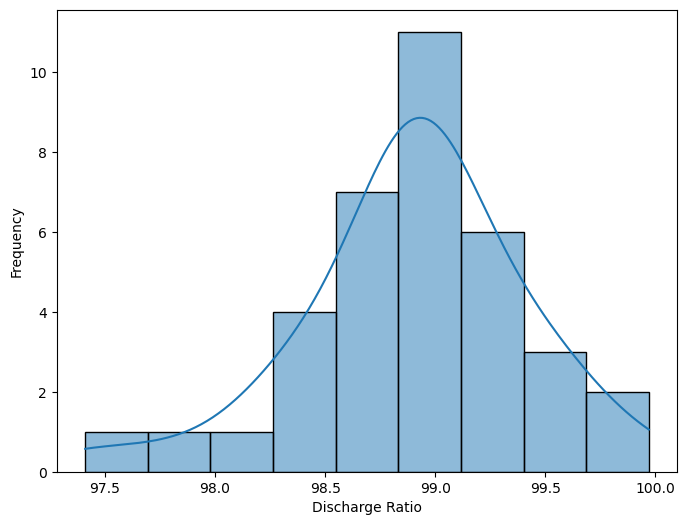

P-value : 0.0
P-value : 0.263


In [53]:
Vars = ['Deaths','Discharge Ratio']

for var in Vars:
    plt.figure(figsize=(8,6))
    sns.histplot(data[var],kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()
    
for var in Vars:
    _,p_val = shapiro(data[var])
    print(f"P-value : {round(p_val,3)}")

According to these barplots and the shapiro's test, only the variable Discharge Ratio follows a normal distribution

In [55]:
spearmanr(data['Discharge Ratio'],data['Deaths'])

SignificanceResult(statistic=-0.2262134841074132, pvalue=0.18462336941223895)

According to the spearman's test, we can see that the pvalue is greater than 5% so we cannot reject the H0 and we can conclude that it exists an correlation between these variables  

### $\chi^2$ test

Test conducted on categorical qualitative variables

#### Hypothèses
H0: There is no association between the two qualitative variables
H1: There is an association between the two qualitative variables

#### Conditions d'application
- The two variales must be qualitatves
- The frequencies in each entry of the contingency table are at least 5
